
##  Lending Club 




### Sections     

 - <a href='#Sampling'>1. Loading sample the datasets</a><br>  
 - <a href='#Format columns 1'>2. Format columns 1</a><br>   
 - <a href='#Column deletion 1'>3. Column deletion 1</a><br>     
 - <a href='#Fill missing values'>4. Fill missing values</a><br> 
 - <a href='#Preliminary data exploration'>5. Preliminary data exploration</a><br>   
 - <a href='#Multicollinearity check'>6. Multicollinearity check</a><br>  
 - <a href='#Down sampling'>7. Down sampling</a><br>  




<p><a name="Sampling"></a></p> 

### 1. Loading small samples of the dataset   


In [2]:

import numpy as np     
import pandas as pd 
import re 
import gzip  
import csv
import random   
import matplotlib.pyplot as plt     
import seaborn as sns   
from sklearn.utils import resample

from sklearn.model_selection import train_test_split  
from sklearn.model_selection import KFold  
from sklearn.model_selection import cross_val_score     
from sklearn.model_selection import RandomizedSearchCV  

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier




pd.set_option('display.max_columns', 900)   
pd.set_option('display.max_rows', 900)

%matplotlib inline
#%config InlineBackend.figure_format = 'svg'   



In [3]:
''' Sampling from the accepted dataset '''

df_accepted = pd.read_csv('datasets_902_370089_accepted_2007_to_2018Q4.csv.gz', 
                          compression = 'gzip', error_bad_lines = False, 
                          parse_dates = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'])

df_accepted.head(5)   



C:\Users\Owner\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,2015-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,2003-08-01,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,2019-01-01,122.67,NaN,2019-03-01,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,2015-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,1999-12-01,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,2016-06-01,926.35,NaN,2019-03-01,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,N

In [4]:

print('shape of df_accept BEFORE dropping ratings and worse than D and old loans: ', df_accepted.shape)


shape of df_accept BEFORE dropping ratings and worse than D and old loans:  (2260701, 151)


In [4]:
''' Drop loans older than 1/1/2012 and ratings worse than grade D  '''   

# drop loans with ratings worse than grade D  
df_accepted = df_accepted.loc[df_accepted['grade'] <= 'D']  

# drop loans older than 1/1/2012   
df_accepted = df_accepted.loc[df_accepted['issue_d'] > '2011-12-31']  

# drop current
df_accepted = df_accepted.loc[df_accepted['loan_status'] != 'Current']  

In [48]:

print('shape of df_accept AFTER dropping ratings worse than D and old loans: ', df_accepted.shape)


shape of df_accept AFTER dropping ratings worse than D and old loans:  (966470, 149)


In [6]:

df_accepted.describe().transpose()    


,count,mean,std,min,25%,50%,75%,max
member_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,2031729.0,14854.687867,9144.900274,1.000000e+03,8000.0000,12000.000000,20000.000000,4.000000e+04
funded_amnt,2031729.0,14854.554274,9144.839056,1.000000e+03,8000.0000,12000.000000,20000.000000,4.000000e+04
funded_amnt_inv,2031729.0,14849.341549,9142.920426,7.250000e+02,8000.0000,12000.000000,20000.000000,4.000000e+04
int_rate,2031729.0,12.198833,3.826297,5.310000e+00,9.1700,11.990000,14.990000,2.235000e+01
installment,2031729.0,438.603092,263.877449,7.610000e+00,248.3000,371.640000,580.140000,1.534880e+03
annual_inc,2031729.0,78711.797343,116953.374599,0.000000e+00,47000.0000,65000.000000,95000.000000,1.100000e+08
dti,2030166.0,18.665546,14.106078,-1.000000e+00,11.8000,17.660000,24.270000,9.990000e+02
delinq_2yrs,2031729.0,0.305063,0.864771,0.000000e+00,0.0000,0.000000,0.000000,5.800000e+01
fico_range_low,2031729.0,699.797261,33.381385,6.600000e+02,675.0000,690.000000,715.000000,8.450000e+02


In [ ]:
''' columns headings of df_accepted '''

#df_accepted.columns.tolist()    


In [ ]:
''' df_accepted info '''

df_accepted.info(verbose = True)    


In [ ]:
''' columns of df_rejected '''

#df_rejected.columns.tolist()    


In [ ]:

#df_rejected.info(verbose = True)   




<p><a name="Format columns 1"></a></p> 

### 2. Format columns 1     


In [5]:
''' Preliminary feature engineering '''

# 1. create a new column for loan issued year 
df_accepted['issued_yr'] = (pd.DatetimeIndex(df_accepted['issue_d']).year).astype('int32')     

# 2. create a new column for the average FICO score 
df_accepted['Avg FICO'] = (0.5 * (df_accepted['fico_range_low'] + df_accepted['fico_range_high'])).astype('int32')  
df_accepted = df_accepted.drop(['fico_range_low', 'fico_range_high'], axis = 1)   # drop the old FICO feature columns 

# 3. drop the word 'months' in the 'term' feature column      
def drop_term(a):  
    return float(a.replace('months', ''))   
df_accepted['term'] = (df_accepted['term'].apply(drop_term)).astype('int32') 
# keep only 3-year loans
df_accepted = df_accepted.loc[df_accepted['term'] == 36]  

# 4. create a numerical 'grade' feature column  
df_accepted['grade_n'] = df_accepted['grade'].replace({'A': 4, 'B': 3, 'C': 2, 'D': 1})   
##df_accepted = df_accepted.drop(['grade'], axis = 1)  # drop the original 'grade' feature column   


# 5. create a numerical 'home_ownership' feature column 
df_accepted['home_ownership_n'] = df_accepted['home_ownership'].replace({'NONE':0, 
                                                                         'ANY': 0, 
                                                                         'OTHER':0,
                                                                         'RENT': 1, 
                                                                         'MORTGAGE': 2, 
                                                                         'OWN': 3})  
df_accepted = df_accepted.drop(['home_ownership'], axis = 1)  


# 6. extract the numerical values of employment length 
df_accepted['emp_length_n'] = df_accepted['emp_length'].str.extract('(\d+)')   
df_accepted['emp_length_n'] = df_accepted['emp_length_n'].fillna(df_accepted['emp_length_n'].median())  # use median to fill null 
df_accepted['emp_length_n'] = df_accepted['emp_length_n'].astype('int32')  
df_accepted = df_accepted.drop(['emp_length'], axis = 1)    


# 7. create a binary 'loan_status' feature column => target label for binary classification  
df_accepted['loan_status_n'] = df_accepted['loan_status'].replace({'Charged Off': 0, 
                                                                   'Default': 0, 
                                                                   'In Grace Period': 0, 
                                                                   'Late (16-30 days)': 0,  
                                                                   'Late (31-120 days)': 0,  
                                                                   'Fully Paid': 1})  
df_accepted = df_accepted.drop(['loan_status'], axis = 1)  


# 8. making 'annual_inc_joint' the default income feature for individual annual and joint applicants      
df_accepted['annual_inc_joint'] = df_accepted['annual_inc_joint'].fillna(df_accepted['annual_inc'])  
df_accepted = df_accepted.drop(['annual_inc'], axis = 1)   # drop the individual income feature 


# 9. making 'dti_joint' the default DTI feature for individual and joint applicants   
df_accepted['dti_joint'] = df_accepted['dti_joint'].fillna(df_accepted['dti'])  
df_accepted = df_accepted.drop(['dti'], axis = 1)   # drop the individual DTI feature 


# 10. making 'verification_status_joint' the default verification feature for individual and joint applicants 
df_accepted['verification_status_joint'] = df_accepted['verification_status_joint'].fillna(df_accepted['verification_status']) 
df_accepted['verification_status_joint_n'] = df_accepted['verification_status_joint'].copy()   
df_accepted['verification_status_joint_n'] = df_accepted['verification_status_joint_n'].replace({'Not Verified': 0, 
                                                                                                 'Verified': 1, 
                                                                                                 'Source Verified': 1}) 
df_accepted = df_accepted.drop(['verification_status'], axis = 1) 
df_accepted = df_accepted.drop(['verification_status_joint'], axis = 1)   





In [8]:
df_accepted.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,issue_d,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,issued_yr,Avg FICO,grade_n,home_ownership_n,emp_length_n,loan_status_n,verification_status_joint_n
0,68407277,NaN,3600.0,3600.0,3600.0,36,13.99,123.03,C,C4,leadman,2015-12-01,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,0.0,2003-08-01,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,2019-01-01,122.67,NaN,2019-03-01,564.0,560.0,0.0,30.0,1.0,Individual,55000.0,5.91,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2015,677,2,2,10,1,0
1,68355089,NaN,24700.0,24700.0,24700.0,36,11.99,820.28,C,C1,Engineer,2015-12-01,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,1.0,1999-12-01,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,2016-06-01,926.35,NaN,2019-03-01,699.0,695.0,0.0,NaN,1.0,Individual,65000.0,16.06,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2015,717,2,2,10,1,0
2,6


<p><a name="Column deletion 1"></a></p> 

### 3. Column deletion 1    



In [6]:
''' drop columns (part 1) '''

df_accepted = df_accepted.drop(['id', 
                                'member_id', 
                                
 'funded_amnt',
 'funded_amnt_inv',

 'installment', 
 'sub_grade',
 'emp_title',
 #'home_ownership',
 'issue_d',
 #'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'title',
 'zip_code',
 'sec_app_fico_range_low', 
 'sec_app_fico_range_high',  
 'earliest_cr_line',
 #'fico_range_low',
 #'fico_range_high',
 'inq_last_6mths',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_act_il',
 'open_il_12m',
 'il_util',
 'open_rv_12m',
 'all_util',
 'total_rev_hi_lim',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'bc_open_to_buy',
 'bc_util',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'num_accts_ever_120_pd',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bc_limit',
 'total_il_high_credit_limit',
 'hardship_flag',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'deferral_term',
 'hardship_amount',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'hardship_length',
 'hardship_dpd',
 'hardship_loan_status',
 'orig_projected_additional_accrued_interest',
 'hardship_payoff_balance_amount',
 'hardship_last_payment_amount',
 'disbursement_method',
 'debt_settlement_flag',
 'debt_settlement_flag_date',                                
 'settlement_status',
 'settlement_date',
 'settlement_amount',
 'settlement_percentage',
 'settlement_term'], axis = 1)


In [8]:
df_accepted.shape 

(966470, 65)

In [11]:

df_accepted.head(10)   


,loan_amnt,term,int_rate,grade,purpose,addr_state,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,annual_inc_joint,dti_joint,open_acc_6m,open_il_24m,mths_since_rcnt_il,total_bal_il,open_rv_24m,max_bal_bc,inq_fi,avg_cur_bal,chargeoff_within_12_mths,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,issued_yr,Avg FICO,grade_n,home_ownership_n,emp_length_n,loan_status_n,verification_status_joint_n
0,3600.0,36,13.99,C,debt_consolidation,PA,0.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,Individual,55000.0,5.91,2.0,1.0,21.0,4981.0,3.0,722.0,3.0,20701.0,0.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,76.9,0.0,0.0,7746.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,677,2,2,10,1,0
1,24700.0,36,11.99,C,small_business,SD,1.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,Individual,65000.0,16.06,1.0,1.0,19.0,18005.0,3.0,6472.0,0.0,9733.0,0.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,97.4,0.0,0.0,39475.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,717,2,2,10,1,0
2,20000.0,60,10.78,B,home_improvement,IL,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,Joint App,71000.0,13.85,0.0,4.0,19.0,10827.0,2.0,2081.0,2.0,31617.0,0.0,184.0,14.0,14.0,5.0,101.0,NaN,10.0,NaN,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,100.0,0.0,0.0,18696.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,697,3,2,10,1,0
3,35000.0,60,14.85,C,debt_consolidation,NJ,0.0,NaN,NaN,13.0,0.0,7802.0,11.6,17.0,Individual,110000.0,17.06,1.0,1.0,23.0,12609.0,1.0,6987.0,0.0,23192.0,0.0,87.0,2.0,2.0,1.0,2.0,NaN,NaN,NaN,4.0,5.0,8.0,10.0,2.0,10.0,13.0,5.0,13.0,100.0,0.0,0.0,52226.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,787,2,2,10,1,1
5,11950.0,36,13.44,C,debt_consolidation,GA,0.0,NaN,NaN,5.0,0.0,8822.0,68.4,6.0,Individual,34000.0,10.20,0.0,0.0,338.0,3976.0,0.0,4522.0,0.0,2560.0,0.0,54.0,32.0,32.0,0.0,36.0,NaN,NaN,NaN,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0,100.0,0.0,0.0,12798.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,692,2,1,4,1,1
6,20000.0,36,9.17,B,debt_consolidation,MN,0.0,49.0,NaN,12.0,0.0,87329.0,84.5,27.0,Individual,180000.0,14.67,0.0,2.0,18.0,29433.0,3.0,13048.0,1.0,30030.0,0.0,306.0,10.0,10.0,4.0,12.0,NaN,10.0,NaN,4.0,6.0,4.0,5.0,7.0,9.0,16.0,6.0,12.0,96.3,0.0,0.0,116762.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,682,3,2,10,1,0
7,20000.0,36,8.49,B,major_purchase,SC,1.0,3.0,NaN,8.0,0.0,826.0,5.7,15.0,Individual,85000.0,17.61,0.0,4.0,13.0,27111.0,0.0,640.0,1.0,17700.0,0.0,55.0,32.0,13.0,3.0,32.0,NaN,8.0,NaN,2.0,2.0,3.0,3.0,9.0,3.0,3.0,2.0,8.0,93.3,0.0,0.0,27937.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,707,3,2,10,1,0
8,10000.0,36,6.49,A,credit_card,PA,0.0,NaN,106.0,14.0,1.0,10464.0,34.5,23.0,Individual,85000.0,13.07,2.0,0.0,35.0,17493.0,7.0,2524.0,2.0,1997.0,0.0,129.0,1.0,1.0,1.0,4.0,NaN,1.0,NaN,6.0,9.0,7.0,10.0,3.0,13.0,19.0,9.0,14.0,95.7,1.0,0.0,27957.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,687,4,1,6,1,0
9,8000.0,36,11.48,B,credit_card,RI,0.0,75.0,NaN,8.0,0.0,7034.0,39.1,18.0,Individual,42000.0,34.80,0.0,3.0,10.0,106748.0,2.0,4725.0,0.0,28528.0,0.0,253.0,15.0,10.0,1.0,50.0,NaN,10.0,NaN,3.0,3.0,3.0,6.0,5.0,5.0,11.0,3.0,8.0,94.4,0.0,0.0,113782.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,702,3,2,10,1,0
10,22400.0,60,12.88,C,debt_consolidation,SC,0.0,54.0,NaN,16.0,0.0,13028.0,32.7,35.0,Individual,95000.0,22.98,1.0,3.0,17.0,171328.0,6.0,8121.0,1.0,23514.0,0.0,248.0,1.0,1.0,5.0,1.0,N

In [12]:
df_accepted.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2031729 entries, 0 to 2258446
Data columns (total 65 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   loan_amnt                            float64
 1   term                                 int32  
 2   int_rate                             float64
 3   grade                                object 
 4   purpose                              object 
 5   addr_state                           object 
 6   delinq_2yrs                          float64
 7   mths_since_last_delinq               float64
 8   mths_since_last_record               float64
 9   open_acc                             float64
 10  pub_rec                              float64
 11  revol_bal                            float64
 12  revol_util                           float64
 13  total_acc                            float64
 14  application_type                     object 
 15  annual_inc_joint                


<p><a name="Fill missing values"></a></p> 

### 4. Fill missing values ====> DISCUSSION POINT <====       


In [9]:
''' Null count (raw count) '''

df_accepted.isnull().sum().sort_values()   


loan_amnt                                   0
emp_length_n                                0
home_ownership_n                            0
grade_n                                     0
Avg FICO                                    0
issued_yr                                   0
tax_liens                                   0
pub_rec_bankruptcies                        0
loan_status_n                               0
chargeoff_within_12_mths                    0
dti_joint                                   0
annual_inc_joint                            0
application_type                            0
verification_status_joint_n                 0
delinq_2yrs                                 0
revol_bal                                   0
pub_rec                                     0
term                                        0
int_rate                                    0
grade                                       0
purpose                                     0
addr_state                        

In [14]:
''' Null count (percentage) '''

100 * df_accepted.isnull().sum().sort_values() / len(df_accepted)


loan_amnt                               0.000000
emp_length_n                            0.000000
home_ownership_n                        0.000000
grade_n                                 0.000000
Avg FICO                                0.000000
issued_yr                               0.000000
tax_liens                               0.000000
pub_rec_bankruptcies                    0.000000
loan_status_n                           0.000000
chargeoff_within_12_mths                0.000000
dti_joint                               0.000000
annual_inc_joint                        0.000000
application_type                        0.000000
verification_status_joint_n             0.000000
delinq_2yrs                             0.000000
revol_bal                               0.000000
pub_rec                                 0.000000
term                                    0.000000
int_rate                                0.000000
grade                                   0.000000
purpose             

In [7]:
''' Fill missing values => manual method for transparency and ease of reversal '''

df_accepted['revol_util'] = df_accepted['revol_util'].fillna(0)  
df_accepted['total_bal_ex_mort'] = df_accepted['total_bal_ex_mort'].fillna(0)  
df_accepted['mort_acc'] = df_accepted['mort_acc'].fillna(0)
df_accepted['num_bc_sats'] = df_accepted['num_bc_sats'].fillna(0) 
df_accepted['num_sats'] = df_accepted['num_sats'].fillna(0)  
df_accepted['num_rev_tl_bal_gt_0'] = df_accepted['num_rev_tl_bal_gt_0'].fillna(0)   
df_accepted['num_op_rev_tl'] = df_accepted['num_op_rev_tl'].fillna(0)  
df_accepted['num_il_tl'] = df_accepted['num_il_tl'].fillna(0) 
df_accepted['num_bc_tl'] = df_accepted['num_bc_tl'].fillna(0)   
df_accepted['num_actv_rev_tl'] = df_accepted['num_actv_rev_tl'].fillna(0) 
df_accepted['num_rev_accts'] = df_accepted['num_rev_accts'].fillna(0)   
df_accepted['num_actv_bc_tl'] = df_accepted['num_actv_bc_tl'].fillna(0)     
df_accepted['mo_sin_rcnt_tl'] = df_accepted['mo_sin_rcnt_tl'].fillna(500)  
df_accepted['mo_sin_rcnt_rev_tl_op'] = df_accepted['mo_sin_rcnt_rev_tl_op'].fillna(500)  
df_accepted['mo_sin_old_rev_tl_op'] = df_accepted['mo_sin_old_rev_tl_op'].fillna(500)  
df_accepted['avg_cur_bal'] = df_accepted['avg_cur_bal'].fillna(0)  
df_accepted['pct_tl_nvr_dlq'] = df_accepted['pct_tl_nvr_dlq'].fillna(0) 
df_accepted['mths_since_recent_bc'] = df_accepted['mths_since_recent_bc'].fillna(500)  
df_accepted['mths_since_recent_inq'] = df_accepted['mths_since_recent_inq'].fillna(500) 
df_accepted['open_il_24m'] = df_accepted['open_il_24m'].fillna(0) 
df_accepted['max_bal_bc'] = df_accepted['max_bal_bc'].fillna(0) 
df_accepted['open_rv_24m'] = df_accepted['open_rv_24m'].fillna(0) 
df_accepted['total_bal_il'] = df_accepted['total_bal_il'].fillna(0)    
df_accepted['inq_fi'] = df_accepted['inq_fi'].fillna(0)  
df_accepted['open_acc_6m'] = df_accepted['open_acc_6m'].fillna(0)   
df_accepted['mths_since_rcnt_il'] = df_accepted['mths_since_rcnt_il'].fillna(500)         
df_accepted['mths_since_last_delinq'] = df_accepted['mths_since_last_delinq'].fillna(500)  
df_accepted['mths_since_recent_revol_delinq'] = df_accepted['mths_since_recent_revol_delinq'].fillna(500)   
df_accepted['mths_since_recent_bc_dlq'] = df_accepted['mths_since_recent_bc_dlq'].fillna(500)    
df_accepted['mths_since_last_record'] = df_accepted['mths_since_last_record'].fillna(500)   
df_accepted['sec_app_open_act_il'] = df_accepted['sec_app_open_act_il'].fillna(0)   
df_accepted['sec_app_num_rev_accts'] = df_accepted['sec_app_num_rev_accts'].fillna(0) 
df_accepted['sec_app_chargeoff_within_12_mths'] = df_accepted['sec_app_chargeoff_within_12_mths'].fillna(0) 
df_accepted['sec_app_collections_12_mths_ex_med'] = df_accepted['sec_app_collections_12_mths_ex_med'].fillna(0)  
df_accepted['sec_app_mort_acc'] = df_accepted['sec_app_mort_acc'].fillna(0)  
df_accepted['sec_app_inq_last_6mths'] = df_accepted['sec_app_inq_last_6mths'].fillna(0)  
df_accepted['sec_app_open_acc'] = df_accepted['sec_app_open_acc'].fillna(0) 
df_accepted['sec_app_earliest_cr_line'] = df_accepted['sec_app_earliest_cr_line'].fillna(0)   
df_accepted['revol_bal_joint'] = df_accepted['revol_bal_joint'].fillna(0)   
df_accepted['sec_app_revol_util'] = df_accepted['sec_app_revol_util'].fillna(0)    
df_accepted['sec_app_mths_since_last_major_derog'] = df_accepted['sec_app_mths_since_last_major_derog'].fillna(500)   



In [9]:
 ''' Null check after filling (raw count) '''

df_accepted.isnull().sum().sort_values()   


loan_amnt                              0
num_actv_bc_tl                         0
num_actv_rev_tl                        0
num_bc_sats                            0
num_bc_tl                              0
num_il_tl                              0
num_op_rev_tl                          0
num_rev_accts                          0
num_rev_tl_bal_gt_0                    0
num_sats                               0
pct_tl_nvr_dlq                         0
pub_rec_bankruptcies                   0
tax_liens                              0
total_bal_ex_mort                      0
revol_bal_joint                        0
sec_app_earliest_cr_line               0
sec_app_inq_last_6mths                 0
sec_app_mort_acc                       0
sec_app_open_acc                       0
sec_app_revol_util                     0
sec_app_open_act_il                    0
sec_app_num_rev_accts                  0
sec_app_chargeoff_within_12_mths       0
sec_app_collections_12_mths_ex_med     0
sec_app_mths_sin


<p><a name="Preliminary data exploration"></a></p> 

### 5. Preliminary data exploration      


In [20]:
df_accepted.describe().transpose()   

,count,mean,std,min,25%,50%,75%,max
loan_amnt,2031729.0,14854.687867,9144.900274,1000.00,8000.00,12000.00,20000.00,4.000000e+04
term,2031729.0,42.080358,10.438290,36.00,36.00,36.00,60.00,6.000000e+01
int_rate,2031729.0,12.198833,3.826297,5.31,9.17,11.99,14.99,2.235000e+01
delinq_2yrs,2031729.0,0.305063,0.864771,0.00,0.00,0.00,0.00,5.800000e+01
mths_since_last_delinq,2031729.0,273.650587,233.099023,0.00,32.00,500.00,500.00,5.000000e+02
mths_since_last_record,2031729.0,432.421295,156.281332,0.00,500.00,500.00,500.00,5.000000e+02
open_acc,2031729.0,11.633893,5.638875,0.00,8.00,11.00,14.00,1.010000e+02
pub_rec,2031729.0,0.196888,0.569557,0.00,0.00,0.00,0.00,8.600000e+01
revol_bal,2031729.0,16726.167903,23133.205646,0.00,5993.00,11336.00,20250.00,2.904836e+06
revol_util,2031729.0,49.530706,24.560872,0.00,30.80,49.30,68.30,8.923000e+02


In [ ]:
''' correlation of numerical features '''   

#df_accepted.corr().style.background_gradient(cmap = 'coolwarm').set_precision(3)


In [21]:

df_accepted.corr() 



,loan_amnt,term,int_rate,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,annual_inc_joint,dti_joint,open_acc_6m,open_il_24m,mths_since_rcnt_il,total_bal_il,open_rv_24m,max_bal_bc,inq_fi,avg_cur_bal,chargeoff_within_12_mths,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,issued_yr,Avg FICO,grade_n,emp_length_n,loan_status_n,verification_status_joint_n
loan_amnt,1.000000,0.378618,0.045034,-0.015045,0.029683,0.089695,0.176140,-0.066418,0.320626,0.087885,0.192054,0.214856,0.014407,-0.007850,0.023856,-0.042710,0.124881,-0.014137,0.286062,0.005721,0.230697,-0.005611,0.148087,-0.011568,-0.024942,0.219777,-0.013695,0.028838,0.003454,0.030009,0.192294,0.145933,0.215524,0.193924,0.077835,0.162304,0.161982,0.145291,0.177160,0.085357,-0.091387,0.004906,0.274670,0.149090,0.046062,0.113655,0.127611,0.109444,0.087923,0.124824,0.000354,0.001827,-0.035689,0.060944,0.133193,-0.043162,0.072171,-0.009238,0.160534
term,0.378618,1.000000,0.299026,-0.015762,0.022368,0.025633,0.070181,-0.025374,0.085632,0.038440,0.090821,0.049518,0.049307,-0.003974,0.029413,-0.019967,0.059974,-0.019515,0.075549,0.012559,0.095165,-0.003872,0.044215,-0.020396,-0.030251,0.109464,0.001603,0.018918,-0.008006,0.024716,0.050356,0.047519,0.055470,0.049394,0.072500,0.050825,0.051083,0.047608,0.072798,0.056221,-0.018324,-0.012030,0.105090,0.077861,0.040327,0.070394,0.080230,0.076123,0.063085,0.075177,0.003898,0.006957,-0.034363,0.048890,0.053408,-0.302467,0.051357,-0.051136,0.053548
int_rate,0.045034,0.299026,1.000000,0.065178,-0.090399,-0.069806,-0.027922,0.057101,-0.038913,0.271521,-0.057430,-0.053976,0.173532,0.075548,0.076147,0.023589,0.008394,0.069137,-0.060723,0.086995,-0.087712,0.016629,-0.124619,-0.020362,-0.009977,-0.099164,-0.015032,-0.060141,-0.099662,-0.067780,0.016655,0.076277,-0.069590,-0.092621,0.004631,-0.028616,-0.065795,0.075936,-0.027633,-0.068351,0.063719,0.013229,-0.006703,0.018830,0.031133,-0.005324,0.018771,0.047805,0.021444,0.011314,0.008825,0.016357,-0.035809,-0.053498,-0.433075,-0.942647,-0.015668,-0.164887,0.185320
delinq_2yrs,-0.015045,-0.015762,0.065178,1.000000,-0.386641,0.033288,0.049077,-0.023241,-0.025639,0.005491,0.117367,0.023001,-0.016817,-0.002147,-0.019352,0.001860,0.027750,-0.033472,-0.038512,0.008182,0.044826,0.140907,0.066184,-0.012518,-0.018036,0.073868,0.033951,-0.336223,-0.014679,-0.377668,-0.030059,0.007690,-0.026435,0.037756,0.082685,0.013934,0.081959,0.003542,0.048846,-0.270555,-0.051282,0.011193,0.027508,-0.020667,-0.007283,-0.006303,-0.017966,-0.016159,-0.012036,-0.014052,0.002890,0.001015,-0.009711,-0.018103,-0.182006,-0.071661,0.021250,-0.021770,0.023383
mths_since_last_delinq,0.029683,0.022368,-0.090399,-0.386641,1.000000,-0.025677,-0.054198,0.004820,0.057603,-0.011057,-0.168953,-0.029757,0.032637,-0.036094,-0.023776,0.013276,-0.043125,-0.025880,0.060987,-0.050760,-0.059399,-0.081151,-0.106007,0.040538,0.042213,-0.122644,-0.014288,0.570209,0.059267,0.730376,0.039408,-0.017758,0.050917,-0.059576,-0.115512,-0.027225,-0.116384,-0.019111,-0.056619,0.376810,0.068960,-0.033546,-0.025048,0.032815,0.009222,0.007138,0.025623,0.023000,0.018567,0.020550,-0.001240,-0.001805,0.031260,0.013146,0.326463,0.096465,-0.045529,0.022518,-0.028994
mths_since_last_record,0.089695,0.025633,-0.069806,0.033288,-0.025677,1.000000,0.021083,-0.807205,0.110502,0.065072,-0.015249,0.019212,0.044787,-0.050795,-0.036342,0.012046,0.014372,-0.085069,0.084755,-0.056050,0.0617

[]

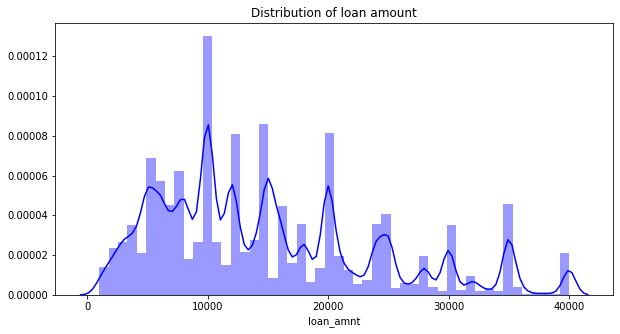

In [22]:
''' histogram of loan amount  '''

plt.figure(figsize = (10, 5))  
sns.distplot(df_accepted['loan_amnt'], color = 'blue')  
plt.title('Distribution of loan amount')   

plt.plot()   


[]

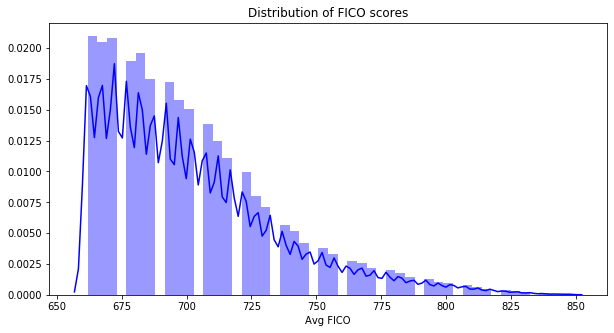

In [23]:
''' histogram of FICO score   '''

plt.figure(figsize = (10, 5))  
sns.distplot(df_accepted['Avg FICO'], color = 'blue')     
plt.title('Distribution of FICO scores')   

plt.plot() 

[]

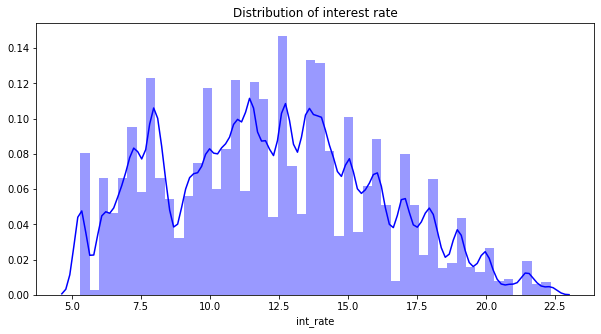

In [24]:
''' histogram of interest rate   '''

plt.figure(figsize = (10, 5))  
sns.distplot(df_accepted['int_rate'], color = 'blue')     
plt.title('Distribution of interest rate')   

plt.plot() 



[]

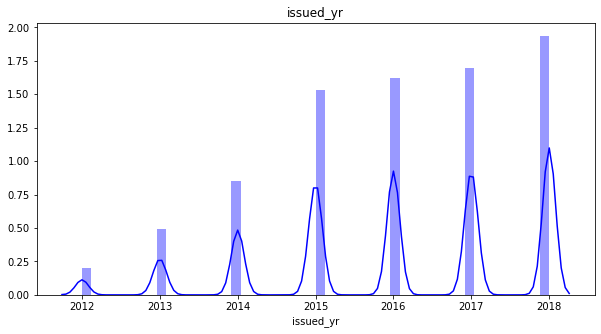

In [25]:
''' histogram of loan issued_yr   '''

plt.figure(figsize = (10, 5))  
sns.distplot(df_accepted['issued_yr'], color = 'blue')     
plt.title('issued_yr')   

plt.plot()     


[]

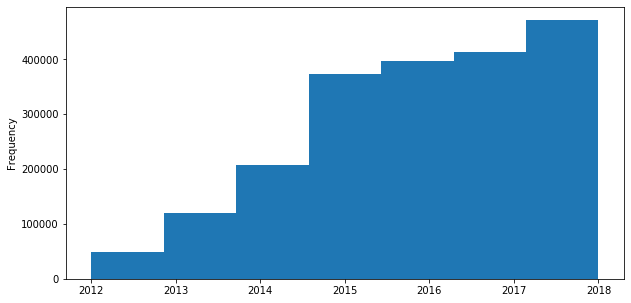

In [26]:
''' histogram of loan issued_yr   '''

plt.figure(figsize = (10, 5))  
df_accepted['issued_yr'].plot.hist(bins = 7) 

plt.plot()     



In [27]:
''' value count of loan purpose '''     

df_accepted['purpose'].value_counts(ascending = True, dropna = False) 


educational                 2
wedding                  1103
renewable_energy         1118
house                   11494
moving                  12632
vacation                13949
small_business          18138
car                     21127
medical                 24169
major_purchase          44309
other                  118495
home_improvement       136094
credit_card            491141
debt_consolidation    1137958
Name: purpose, dtype: int64

In [28]:
''' value count of loan purpose (percentage) '''     

100 * df_accepted['purpose'].value_counts(ascending = True, dropna = False) / len(df_accepted)

educational            0.000098
wedding                0.054289
renewable_energy       0.055027
house                  0.565725
moving                 0.621736
vacation               0.686558
small_business         0.892737
car                    1.039853
medical                1.189578
major_purchase         2.180852
other                  5.832225
home_improvement       6.698433
credit_card           24.173549
debt_consolidation    56.009340
Name: purpose, dtype: float64

In [29]:
''' value count of loan GRADE  '''

df_accepted['grade'].value_counts(ascending = True, dropna = False)    


D    318097
A    422425
C    640694
B    650513
Name: grade, dtype: int64

In [30]:
''' Median FICO scores and grade => info for box plot '''   

df_accepted.groupby('grade')['Avg FICO'].median().sort_values(ascending = False)   


grade
A    727
B    697
C    687
D    682
Name: Avg FICO, dtype: int32

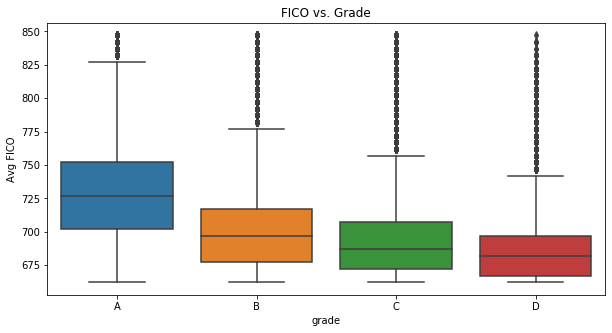

In [31]:
''' Boxplot of Avg FICO vs. Grade '''   

plt.figure(figsize = (10, 5)) 
ax = sns.boxplot(x = 'grade', y = 'Avg FICO', data = df_accepted, order = ['A', 'B', 'C', 'D']) 

ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)  
plt.title('FICO vs. Grade')

plt.show()      


In [32]:
''' Median DTI and grade => info for box plot '''   

df_accepted.groupby('grade')['dti_joint'].median().sort_values(ascending = False)   



grade
D    20.00
C    18.54
B    16.97
A    15.20
Name: dti_joint, dtype: float64

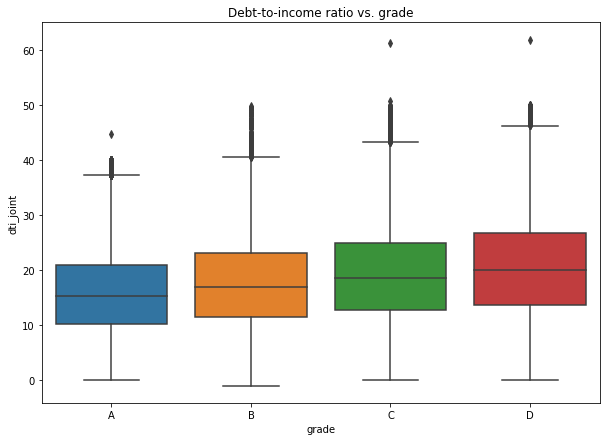

In [33]:
''' Boxplot of DTI vs Grade '''   

plt.figure(figsize = (10, 7)) 
ax = sns.boxplot(x = 'grade', y = 'dti_joint', data = df_accepted, order = ['A', 'B', 'C', 'D']) 

ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)  
plt.title('Debt-to-income ratio vs. grade')

plt.show()      



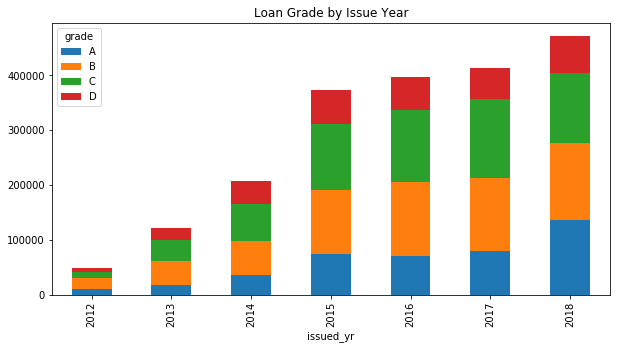

In [34]:
''' Plot of loan grade by year '''

df2 = df_accepted.groupby(['issued_yr','grade'])['grade'].count().unstack('grade')#.fillna(0)
df2.plot(kind = 'bar', stacked = True, figsize = (10, 5))   
plt.title('Loan Grade by Issue Year')

plt.show() 


In [35]:
''' interest rate by issued year and grade '''   

df_accepted.groupby(['issued_yr', 'grade', 'term'])[['int_rate']].median() 


int_rate
issued_yr grade term          
2012      A     36        7.90
                60        8.90
          B     36       12.12
                60       12.12
          C     36       15.31
                60       15.31
          D     36       18.49
                60       18.75
2013      A     36        7.90
                60        8.90
          B     36       11.99
                60       12.12
          C     36       15.31
                60       15.80
          D     36       18.55
                60       18.75
2014      A     36        7.69
                60        8.39
          B     36       10.99
                60       11.44
          C     36       13.98
                60       14.49
          D     36       16.99
                60       16.99
2015      A     36        6.92
                60        7.89
          B     36        9.99
                60        9.99
          C     36       13.18
                60       13.33
          D     36       16.55
                60       16.99
2016      A     36        6.99
                60        7.89
          B     36       10.49
                60       10.49
          C     36       13.67
                60       13.99
          D     36       17.99
                60       18.25
2017      A     36        7.21
                60        7.97
          B     36       10.49
                60       10.42
          C     36       13.99
                60       14.08
          D     36       18.06
                60       18.99
2018      A     36        7.21
                60        7.46
          B     36       10.72
                60       10.90
          C     36       14.52
                60       14.52
          D     36       19.03
                60       19.42

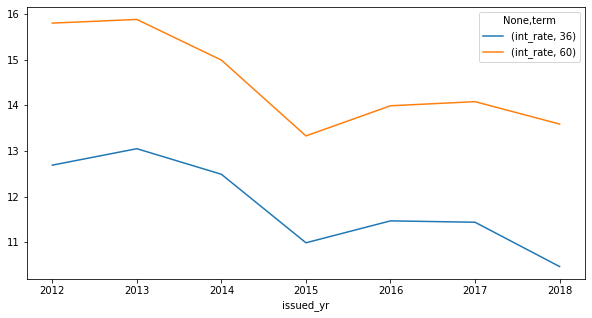

In [36]:

# plot data
fig, ax = plt.subplots(figsize = (10,5))

# use unstack()
df_accepted.groupby(['issued_yr', 'term'])[['int_rate']].median().unstack().plot(ax = ax)    



###  Loan status (binary classification: 1 = performing, 0 = nonperforming) 

In [37]:
''' Loan status breakdown '''

df_accepted['loan_status_n'].value_counts(ascending = True, dropna = False)   


0     238270
1    1793459
Name: loan_status_n, dtype: int64

In [38]:
''' value count of loan status (percentage) '''     

100 * df_accepted['loan_status_n'].value_counts(ascending = True, dropna = False) / len(df_accepted)



0    11.72745
1    88.27255
Name: loan_status_n, dtype: float64

In [39]:
''' loan status by year '''

df_accepted.groupby(['issued_yr', 'loan_status_n'])[['loan_status_n']].count()    


loan_status_n
issued_yr loan_status_n               
2012      0                       7086
          1                      41467
2013      0                      16585
          1                     103794
2014      0                      32073
          1                     175330
2015      0                      60207
          1                     313576
2016      0                      61251
          1                     335057
2017      0                      43009
          1                     370311
2018      0                      18059
          1                     453924

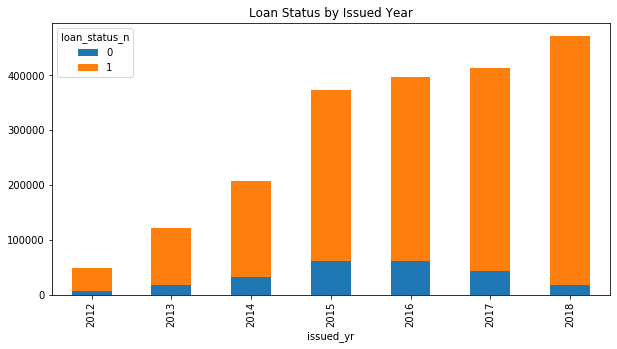

In [40]:
''' Plot of loan status by issued year '''

df3 = df_accepted.groupby(['issued_yr','loan_status_n'])['loan_status_n'].count().unstack('loan_status_n')#.fillna(0)
df3.plot(kind = 'bar', stacked = True, figsize = (10, 5))   
plt.title('Loan Status by Issued Year')

plt.show() 


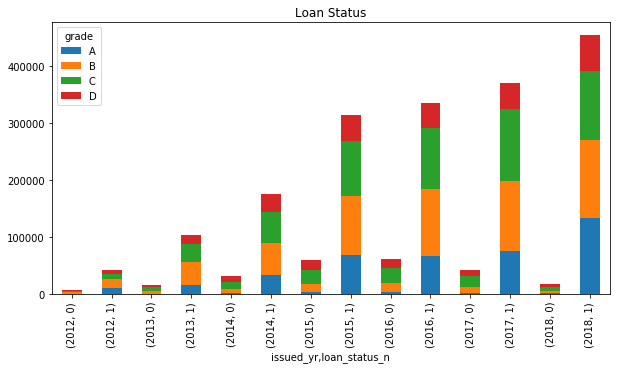

In [41]:
''' Plot of loan status by grade and by year '''

df4 = df_accepted.groupby(['issued_yr','grade', 'loan_status_n'])['loan_status_n'].count().unstack('grade')    
df4.plot(kind = 'bar', stacked = True, figsize = (10, 5))   
plt.title('Loan Status')

plt.show() 


In [42]:
''' Loan status by grade '''

df_accepted.groupby(['issued_yr', 'grade', 'loan_status_n'])[['loan_status_n']].count()  


loan_status_n
issued_yr grade loan_status_n               
2012      A     0                        787
                1                      10102
          B     0                       2399
                1                      16091
          C     0                       2181
                1                       9676
          D     0                       1719
                1                       5598
2013      A     0                        830
                1                      16831
          B     0                       4487
                1                      39581
          C     0                       6672
                1                      31428
          D     0                       4596
                1                      15954
2014      A     0                       1948
                1                      34122
          B     0                       6852
                1                      55027
          C     0                      12348
                1                      54157
          D     0                      10925
                1                      32024
2015      A     0                       4013
                1                      69254
          B     0                      14240
                1                     103239
          C     0                      24169
                1                      96280
          D     0                      17785
                1                      44803
2016      A     0                       4004
                1                      66773
          B     0                      16095
                1                     118269
          C     0                      25120
                1                     106934
          D     0                      16032
                1                      43081
2017      A     0                       2654
                1                      76060
          B     0                      10221
                1                     122784
          C     0                      19175
                1                     125827
          D     0                      10959
                1                      45640
2018      A     0                       1645
                1                     133402
          B     0                       4354
                1                     136874
          C     0                       6571
                1                     120156
          D     0                       5489
                1                      63492

###  Document verification  

In [43]:
''' document verification '''

df_accepted.groupby(['grade', 'issued_yr', 'verification_status_joint_n'])[['verification_status_joint_n']].count()  


verification_status_joint_n
grade issued_yr verification_status_joint_n                             
A     2012      0                                                   5478
                1                                                   5411
      2013      0                                                   6232
                1                                                  11429
      2014      0                                                  15989
                1                                                  20081
      2015      0                                                  30964
                1                                                  42303
      2016      0                                                  34911
                1                                                  35866
      2017      0                                                  44277
                1                                                  34437
      2018      0                                                  70959
                1                                                  64088
B     2012      0                                                   8113
                1                                                  10377
      2013      0                                                  16341
                1                                                  27727
      2014      0                                                  22942
                1                                                  38937
      2015      0                                                  37481
                1                                                  79998
      2016      0                                                  46352
                1                                                  88012
      2017      0                                                  53596
                1                                                  79409
      2018      0                                                  59522
                1                                                  81706
C     2012      0                                                   4308
                1                                                   7549
      2013      0                                                   9330
                1                                                  28770
      2014      0                                                  17580
                1                                                  48925
      2015      0                                                  29778
                1                                                  90671
      2016      0                                                  34101
                1                                                  97953
      2017      0                                                  45796
                1                                                  99206
      2018      0                                                  44153
                1                                                  82574
D     2012      0                                                   1778
                1                                                   5539
      2013      0                                                   5694
                1                                                  14856
      2014      0                                                   8332
                1                                                  34617
      2015      0                                                  11220
                1                                                  51368
      2016      0                                                  12929
                1                                                  46184
      2017      0                                                  13695
                1             

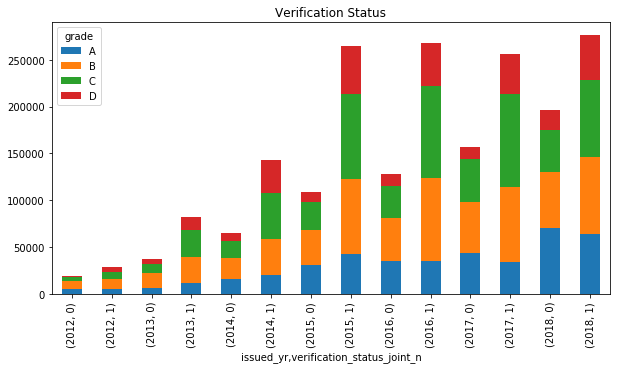

In [44]:
''' Plot of document verification status by and by year '''

df6 = df_accepted.groupby(['issued_yr','grade', 'verification_status_joint_n'])['verification_status_joint_n'].count().unstack('grade')    
df6.plot(kind = 'bar', stacked = True, figsize = (10, 5))   
plt.title('Verification Status')

plt.show() 



<p><a name="Multicollinearity check"></a></p> 

### 6. Multicollinearity check         



In [45]:

df_accepted.columns 


Index(['loan_amnt', 'term', 'int_rate', 'grade', 'purpose', 'addr_state',
       'delinq_2yrs', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'application_type', 'annual_inc_joint', 'dti_joint', 'open_acc_6m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'open_rv_24m',
       'max_bal_bc', 'inq_fi', 'avg_cur_bal', 'chargeoff_within_12_mths',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'pct_tl_nvr_dlq', 'pub_rec_bankruptcies', 'tax_liens',
       'total_bal_ex_mort', 'revol_bal_joint', 'sec_app_earliest_cr_line',
       'sec_app_inq_last_6mths', 'sec_app_mort_ac

<p><a name="Down sampling"></a></p> 

## Down sampling

### Returns the Distribution of Grade and Class of the Majority (Good) Class

In [9]:
def percentage_good_loans(dataframe):
    years = sorted(list(dataframe.issued_yr.unique()))
    grade = sorted(list(dataframe.grade.unique()))
    dist = {}
    for x in years:
        for y in grade:
            num = dataframe[dataframe['grade'] == y][dataframe['issued_yr']== x][dataframe['loan_status_n'] ==1].term.count()
            percentage = round(num / len(dataframe[dataframe['loan_status_n']==1].term),5)
            place = str(x) +'_'+ y
            dist[place] = percentage
    return dist

### Returns the Distribution of Grade and Class of the Minority (Bad loan) Class

In [10]:
def percentage_bad_loans(dataframe):
    years = sorted(list(dataframe.issued_yr.unique()))
    grade = sorted(list(dataframe.grade.unique()))
    dist = {}
    for x in years:
        for y in grade:
            num = dataframe[dataframe['grade'] == y][dataframe['issued_yr']== x][dataframe['loan_status_n'] ==0].term.count()
            percentage = round(num / len(dataframe[dataframe['loan_status_n']==0].term),5)
            place = str(x) +'_'+ y
            dist[place] = percentage
    return dist

### Returns a DF of a Downsized Minority (Bad Loan) Class

In [11]:
#--- Since the data of just the bad loans within the original 2.2M dataset might still be too large, this function 
#--- allows us to downsize the minority class first



def pro_down_sample_minority(data, percent_of_data):
    dist = percentage_bad_loans(data)
    data_1 = data[data['loan_status_n'] == 0]
    years_ = list(data.issued_yr.unique())
    grade_ = list(data.grade.unique())
    sample_down_df = pd.DataFrame(columns = data.columns)
    #desired size of sample down size
    size_of_sample = percent_of_data*(data_1.shape[0])

    #print(size_of_sample)
    for x in years_:
        for y in grade_:
            year_class = str(x)+'_'+y
            year_class_prop = dist[year_class]
            target_num = int(size_of_sample* year_class_prop)
            #delete_later = size_of_sample* year_class_prop
            #print(str(target_num) + '_' + str(delete_later))
            temp_df = data_1[data_1['grade'] == y][data_1['issued_yr']== x]
            sample_temp_df = resample(temp_df,
                                     replace = False,
                                     n_samples = target_num,
                                     random_state=123)
            sample_down_df = pd.concat([sample_down_df,sample_temp_df])
    return sample_down_df


### Returns a DF of a Downsized Majority (Good Loan) Class

In [155]:
#--- after downsizing the minority class, its shape[0] is now the target size of the dataframe of good loans we want



def pro_down_sample_combined_dict_minority(data, downsized_minority_size):
    dist = percentage_good_loans(data)
    data_1 = data[data['loan_status_n'] == 1]
    years_ = list(data.issued_yr.unique())
    grade_ = list(data.grade.unique())
    sample_down_df = pd.DataFrame(columns = data.columns)
    #desired size of sample down size======= might have to change a little bit to match the # of bad loans
    #size_of_sample = percent_of_data*(data_1.shape[0])
    size_of_sample = downsized_minority_size
    for x in years_:
        for y in grade_:
            year_class = str(x)+'_'+y
            # this 'dist' needs to refer to the output of percentage(dataframe) assigned to 'dist' variable name
            year_class_prop = dist[year_class]
            target_num = int(size_of_sample* year_class_prop)
            temp_df = data_1[data_1['grade'] == y][data_1['issued_yr']== x]
            sample_temp_df = resample(temp_df,
                                     replace = False,
                                     n_samples = target_num,
                                     random_state=123)
            sample_down_df = pd.concat([sample_down_df,sample_temp_df])
    return sample_down_df

## Steps

In [156]:
data = df_accepted.copy()

#: 1. Downsize the minority class into a new dataframe and choose the percentage wanted from the original dataset
df_accepted0 = pro_down_sample_minority(data,percent_of_data=.8)

KeyboardInterrupt: 

In [159]:
#: 2. Downsize the majority class into a new dataframe, the new target size is the shape[0] of the previously create
# minority class. input data is the original dataset
downsized_minority_size = df_accepted0.shape[0]
df_accepted1 = pro_down_sample_combined_dict_minority(data, downsized_minority_size)

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [161]:
df_accepted01=pd.concat([df_accepted0,df_accepted1]) #the dataset includes bad loans and good loans
df_accepted01.issued_yr = df_accepted01.issued_yr.astype('int64')
df_accepted01['Avg FICO'] =df_accepted01['Avg FICO'].astype('float64')
df_accepted01.grade_n =df_accepted01.grade_n.astype('int64')
df_accepted01.home_ownership_n=df_accepted01.home_ownership_n.astype('int64') 
df_accepted01.emp_length_n=df_accepted01.emp_length_n.astype('int64')
df_accepted01.loan_status_n=df_accepted01.loan_status_n.astype('int64')
df_accepted01.verification_status_joint_n=df_accepted01.verification_status_joint_n.astype('int64')
df_LC =df_accepted01.drop(columns=['grade','sec_app_earliest_cr_line'])

In [164]:
df_LC = pd.get_dummies(df_LC, drop_first=True) 

## unbalance set

In [197]:
df_accepted_unbal = df_accepted.sample(round(df_accepted.shape[0]*.25))

In [198]:
df_accepted_unbal.shape

(241618, 65)

In [203]:
df_accepted_unbal=df_accepted_unbal.drop(columns=['grade','sec_app_earliest_cr_line'])

KeyError: "['grade' 'sec_app_earliest_cr_line'] not found in axis"

In [201]:
df_accepted_unbal = pd.get_dummies(df_accepted_unbal, drop_first=True)

In [202]:
df_accepted_unbal.shape

(241618, 124)

In [207]:
train_un, test_un = train_test_split(df_accepted_unbal, stratify=df_accepted_unbal['loan_status_n'],test_size=.2,random_state=42)
train_un.reset_index(drop=True, inplace=True)
test_un.reset_index(drop=True, inplace=True)
print(f'train shape: {train_un.shape},test shape:{test_un.shape}')

train shape: (193294, 124),test shape:(48324, 124)


In [208]:
##creating the independent and dependent array
X_train_un = train_un.drop('loan_status_n', axis=1)
y_train_un = train_un['loan_status_n']
X_test_un = test_un.drop('loan_status_n', axis=1)
y_test_un = test_un['loan_status_n']

In [209]:
un_models = {'LDA': LinearDiscriminantAnalysis(),
          'GNB': GaussianNB(),
          'LR': LogisticRegression(C=1),
#           'SVC': SVC(gamma='auto'),
          'RF': RandomForestClassifier(n_estimators=500),
          'GB' : GradientBoostingClassifier(max_depth= 5, n_estimators=500)}
         
unbalset = {}
for i in un_models.keys():
    scores = cross_val_score(un_models[i], X_train_un - np.min(X_train_un) + 1,
                                    y_train_un, cv=5)
    un_models[i].fit(X_train_un,y_train_un)
    y_pred = un_models[i].predict(X_test_un)
    y_score_un = un_models[i].predict_proba(X_test_un)[:,1]

    auc = metrics.roc_auc_score(y_test_un, y_score_un)
    
    balset[i] = scores,auc
    print(f'{i}, mean_score:{np.mean(scores)},auc:{auc}')

LDA, mean_score:0.8303465180336864,auc:0.6998661511537041
GNB, mean_score:0.8148209500309935,auc:0.6624897595356178


C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

LR, mean_score:0.8305068965336483,auc:0.6256947005833575
RF, mean_score:0.8311173666843079,auc:0.7005792165326503
GB, mean_score:0.8311587475095059,auc:0.7135560632212966


In [210]:
tp_un, fp_un = createROC(un_models, X_train_un - np.min(X_train_un) + 1, y_train_un, X_test_un - np.min(X_test_un) + 1, y_test_un)

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(0, 1)

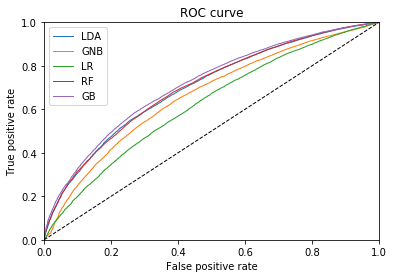

In [211]:
for i in range(0, len(tp_un)):
    plt.plot(fp_un[i], tp_un[i], lw=1)

plt.plot([0, 1], [0, 1], '--k', lw=1)
plt.legend(un_models.keys())
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.xlim(0,1)
plt.ylim(0,1)

(0.0, 2.0, 2.0, 0.0)

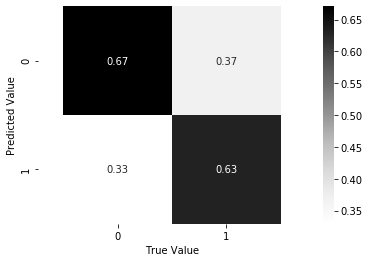

In [213]:
cm1 = confusion_matrix(y_test_un, y_pred).T
cm1 = cm.astype('float')/cm.sum(axis=0)

ax = sns.heatmap(cm, annot=True, cmap='Greys');
ax.set_xlabel('True Value')
ax.set_ylabel('Predicted Value')
ax.axis('equal')

<p><a name="Machine Learning"></a></p> 


# Machine Learning

In [166]:
train, test = train_test_split(df_LC, stratify=df_LC['loan_status_n'],test_size=.2,random_state=42)
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)
print(f'train shape: {train.shape},test shape:{test.shape}')

train shape: (209269, 123),test shape:(52318, 123)


In [167]:
##creating the independent and dependent array
X_train = train.drop('loan_status_n', axis=1)
y_train = train['loan_status_n']
X_test= test.drop('loan_status_n', axis=1)
y_test = test['loan_status_n']

In [56]:
# #Scale the data so that each column has a mean of zero and unit standard deviation.
# sc = StandardScaler()
# numerical = X_train.columns[(X_train.dtypes == 'float64') | (X_train.dtypes == 'int64')| (X_train.dtypes == 'int32')].tolist()
# X_train[numerical] = sc.fit_transform(X_train[numerical])

## Model Selection

In [172]:
models = {'LDA': LinearDiscriminantAnalysis(),
          'GNB': GaussianNB(),
          'LR': LogisticRegression(C=1),
          'RF': RandomForestClassifier(n_estimators=100),
          'GB' : GradientBoostingClassifier(max_depth= 5, n_estimators=100)}
         
balset = {}
for i in models.keys():
    scores = cross_val_score(models[i], X_train - np.min(X_train) + 1,
                                    y_train, cv=5)
    models[i].fit(X_train,y_train)
    y_pred = models[i].predict(X_test)
    y_score = models[i].predict_proba(X_test)[:,1]

    auc = metrics.roc_auc_score(y_test, y_score)
    
    balset[i] = scores,auc
    print(f'{i}, mean_score:{np.mean(scores)},auc:{auc}')
    


LDA, mean_score:0.6439845353149026,auc:0.6982906291290775
GNB, mean_score:0.5785233599770555,auc:0.6573341440675846


C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

LR, mean_score:0.5847927812604989,auc:0.6160330348414353
RF, mean_score:0.6443238231803654,auc:0.697766614776635
GB, mean_score:0.6523517596261305,auc:0.7092848464038695


## Create ROC

In [91]:
def createROC(models, X_train, y_train, X_test, y_test):
    false_p, true_p = [], [] ##false postives and true positives

    for i in models.keys():  ##dict of models
        models[i].fit(X_train, y_train)

        fp, tp, threshold = roc_curve(y_test, models[i].predict_proba(X_test)[:,1]) ##roc_curve function
        
        true_p.append(tp)
        false_p.append(fp)
    return true_p, false_p

In [173]:
tp, fp = createROC(models, X_train - np.min(X_train) + 1, y_train, X_test - np.min(X_test) + 1, y_test)

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(0, 1)

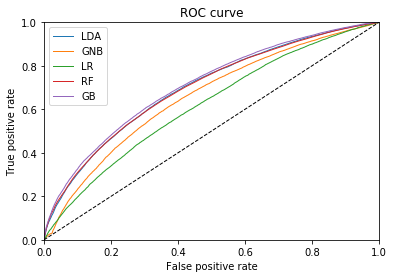

In [174]:
for i in range(0, len(tp)):
    plt.plot(fp[i], tp[i], lw=1)

plt.plot([0, 1], [0, 1], '--k', lw=1)
plt.legend(models.keys())
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.xlim(0,1)
plt.ylim(0,1)

## Tune Hyperparameter

In [178]:
from scipy.stats import uniform, randint
params = {
    'n_estimators':randint(100,800),
    'max_depth':randint(2, 6),
    'min_samples_split':randint(200,1000),
    'min_samples_leaf':randint(30,70),
    'learning_rate':uniform(0.03, 0.3)
}

search = RandomizedSearchCV(estimator = GradientBoostingClassifier(max_features='sqrt',random_state=42),
                            param_distributions = params, scoring='roc_auc',n_jobs=-1,iid=False, cv=5, return_train_score=True)

search.fit(X_train, y_train)



C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features='sqrt',
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                  

In [179]:
search.best_params_

{'learning_rate': 0.2623081836755643,
 'max_depth': 4,
 'min_samples_leaf': 47,
 'min_samples_split': 213,
 'n_estimators': 786}

In [181]:
search.best_score_

0.7112923654089346

In [180]:
search.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2623081836755643, loss='deviance',
                           max_depth=4, max_features='sqrt',
                           max_leaf_nodes=None, min_impurity_decrease=0.0,
                           min_impurity_split=None, min_samples_leaf=47,
                           min_samples_split=213, min_weight_fraction_leaf=0.0,
                           n_estimators=786, n_iter_no_change=None,
                           presort='deprecated', random_state=42, subsample=1.0,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [182]:
y_pred_new = search.best_estimator_.predict(X_test)
y_score_new = search.best_estimator_.predict_proba(X_test)[:,1]

In [183]:
metrics.roc_auc_score(y_test, y_score_new)

0.710825934166707

(0.0, 2.0, 2.0, 0.0)

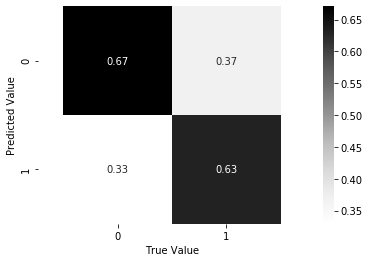

In [190]:
cm = confusion_matrix(y_test, y_pred).T
cm = cm.astype('float')/cm.sum(axis=0)

ax = sns.heatmap(cm, annot=True, cmap='Greys');
ax.set_xlabel('True Value')
ax.set_ylabel('Predicted Value')
ax.axis('equal')

## Feature Importance with RF

In [191]:
forest = RandomForestClassifier(n_estimators=500)

scores = cross_val_score(forest, X_train - np.min(X_train) + 1,
                                    y_train, cv=5)
forest.fit(X_train,y_train)
y_pred = forest.predict(X_test)
y_score = forest.predict_proba(X_test)[:,1]

auc = metrics.roc_auc_score(y_test, y_score)

print(f'{i}, mean_score:{np.mean(scores)},auc:{auc}')

4, mean_score:0.6496710127229556,auc:0.7044968175049153


In [192]:
# forest = RandomForestClassifier(n_estimators=500)
# forest.fit(X_train,y_train)
importances = forest.feature_importances_

In [193]:
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(15):
    print(f + 1, df_LC.columns[indices[f]], importances[indices[f]])


Feature ranking:
1 int_rate 0.05529918679683264
2 dti_joint 0.03893954880394378
3 avg_cur_bal 0.03645302399806036
4 revol_util 0.034968539112172625
5 annual_inc_joint 0.03371942600738986
6 revol_bal 0.03359036400030464
7 mo_sin_old_rev_tl_op 0.033458265673325306
8 total_bal_ex_mort 0.032448931824735225
9 loan_amnt 0.032043904275716024
10 Avg FICO 0.029240029830358984
11 mths_since_recent_bc 0.027697129425550165
12 grade_n 0.027422916851160245
13 total_acc 0.02656496071368047
14 mths_since_recent_inq 0.023730406417001863
15 mo_sin_rcnt_rev_tl_op 0.02330228183407628


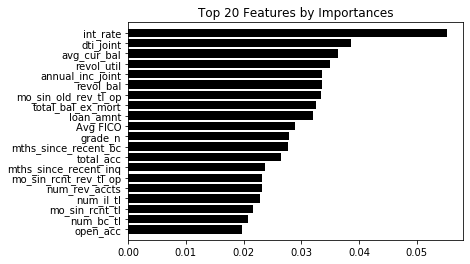

In [177]:
# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Top 20 Features by Importances")
plt.barh(range(20), importances[indices][:20][::-1],
         color='black',yerr=std[indices][:20], align="center")
plt.yticks(range(20), df_LC.columns[indices[:20][::-1]])
plt.ylim([-1, 20])
plt.show()

##     
##  ********************     

### information provided by Lending Club 

####  https://www.lendingclub.com/info/demand-and-credit-profile.action   


##  ********************     